# Retail Customer Analysis Summative Lab
## Understanding Customer Behavior Across Store Locations

### Introduction

This summative lab bridges the concepts and techniques learned throughout the course with their practical application to a real-world industry scenario. You will step into the role of a junior data analyst for a retail company and apply your skills to evaluate customer behavior, satisfaction, and promotional impacts. By following the outlined process, you will gain experience in experimental design, statistical testing, and actionable decision-making.

Your task is not only to conduct the analysis but also to reflect on how these techniques help solve real-world problems that businesses face daily.

By completing this lab, you will have:
- Practiced designing and executing statistical analyses in a real-world scenario.
- Reinforced your understanding of test selection and assumptions.
- Applied statistical results to business decision-making.
- Developed skills in communicating insights effectively through visualizations and reports.

### Business Scenario Questions:
Imagine you are a junior data analyst working for a retail company that operates stores in three distinct regions: City Center, Suburb, and Rural. Your manager has tasked you with analyzing customer behavior and preferences across these locations. The goal is to help the company answer two key questions:
1. Do customer spending patterns, satisfaction levels, and product preferences differ across store locations?
2. Do promotional periods result in significantly higher spending compared to non-promotional periods?

Spending Across Location:

- Business-relevant MDE: Absolute difference in spending of 15% or more
- Justification: This represents enough of a difference to warrant location-specific strategies (inventory, staffing, etc.)


Ratings Across Locations:

- Business-relevant MDE: 1.0 point difference between locations
- Justification: On a 10-point scale, a one point difference is noticeable and actionable for customer service improvements

Promotional Spending:

- Business-relevant MDE: A $15 increase from non-promotional periods
- Justification: Promotional costs typically reduce margins by ~15-20%. Need at least 25% increase in spending to justify promotional costs. This aligns with industry standards for promotional ROI

Your task involves designing and conducting an analysis using the provided dataset to derive actionable insights. You will apply statistical concepts and techniques such as experimental design, test selection, hypothesis testing, and result interpretation. This process mimics real-world industry scenarios where junior analysts evaluate business performance using data.

The data focuses on four variables:
- Amount spent by customers (in dollars)
- Customer satisfaction ratings (scale of 1 to 10)
- Product category preferences (Electronics, Clothing, Groceries)
- Purchase type (Promotional vs. Non-Promotional)

Your analysis will inform decision-making around marketing strategies, store operations, and promotional campaigns.

### Setup

In this cell, import all the libraries you'll need for your analysis. Consider which libraries you'll need for:
- Data manipulation
- Statistical analysis
- Data visualization

In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

### Part 1: Experimental Design

#### 1.1 Hypothesis Formulation

For each of the following analyses, state your null and alternative hypotheses in both statistical and plain language:

1. Spending across store locations
2. Customer satisfaction across locations
3. Promotional vs non-promotional spending
4. Product category preferences across locations

1. H0: There is no statistically significant difference in average spending across store locations.
u_city_center = u_suburb = u_rural

H1: At least one store's average spending (u) differs by 15% or more from the others.

Plain language: We are testing whether spending differs across stores in a way that is large enough (≥15%) to justify business strategy changes (e.g., staffing, inventory).

2. H0: There is no statistically significant difference in average customer satisfaction across store locations
u_city_center = u_suburb = u_rural

H1: At least one store's average customer satisfaction score differs from the others by at least 1.0 point

Plain language: A ≥1.0 point difference on a 10-point scale is considered operationally meaningful, and could justify changes to service, training, or layout.

3. H0: There is no statistically significant difference in promotional vs non-promotional spending
u_promotional = u_non_promotional

H1: The average promotional spending differs from non-promotional spending by at least $15.
u_promotional /= u_non_promotional

Plain language: A $15 increase is needed to offset promotional costs and deliver ROI. Smaller effects, even if statistically significant, may not be worth acting on.

4. H0: Product category preference is independent of store location.

H1: Product category preferences depend on store location.

Plain language: We’re checking if the distribution of purchased product types differs significantly by location — if so, store-specific merchandising may be justified.

**Reflective Question: Explain the concept of Minimum Detectable Effect (MDE) and why it is important.**

Minimum detectable effect is the smallest true difference/ effect between groups that your experiment is design to reliably detect as statistically significant, given the chosen sample size, significant level (alpha=0.05), and statistical power (0.8).
It is important as the size of the effect impacts how much time, resources, and effort will be allocated towards your experiment. Choosing an appropriate MDE helps ensure your test is statistically sound and practically feasible

### Part 2: Data Exploration

#### 2.1 Load and Examine the Dataset

Load the dataset and perform initial data quality checks:
- Check for missing values
- Examine data types
- Look for inconsistencies
- Generate summary statistics

In [2]:
# Load Data
retail_df = pd.read_csv('retail_store_customer_data.csv')

# Initial EDA - Create new cells as needed
retail_df.head()

,Store_Location,Customer_Satisfaction,Product_Category,Purchase_Type,Amount_Spent
0,Rural,5.6,Groceries,Non-Promotional,40.45
1,City Center,9.7,Clothing,Promotional,53.20
2,Rural,4.4,Electronics,Non-Promotional,42.77
3,Rural,4.2,Clothing,Promotional,42.08
4,City Center,9.3,Clothing,Non-Promotional,84.25


In [3]:
retail_df.describe()
retail_df.info()
retail_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store_Location         1500 non-null   object 
 1   Customer_Satisfaction  1500 non-null   float64
 2   Product_Category       1500 non-null   object 
 3   Purchase_Type          1500 non-null   object 
 4   Amount_Spent           1500 non-null   float64
dtypes: float64(2), object(3)
memory usage: 58.7+ KB


,0
Store_Location,0
Customer_Satisfaction,0
Product_Category,0
Purchase_Type,0
Amount_Spent,0


In [4]:
retail_df['Store_Location'].value_counts()

,count
Store_Location,
City Center,520
Suburb,492
Rural,488


In [5]:
retail_df['Product_Category'].value_counts()

,count
Product_Category,
Electronics,583
Groceries,464
Clothing,453


In [6]:
retail_df['Purchase_Type'].value_counts()

,count
Purchase_Type,
Promotional,888
Non-Promotional,612


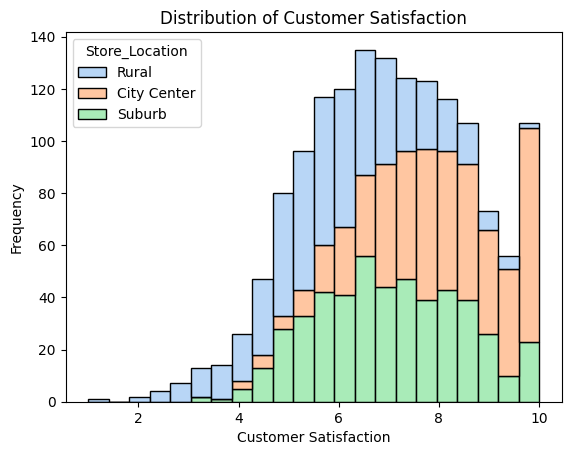

In [7]:
sns.histplot(data=retail_df, x='Customer_Satisfaction', hue='Store_Location', multiple='stack', palette='pastel')
plt.title('Distribution of Customer Satisfaction')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Frequency')
plt.show()

<ipython-input-8-a9c22ddc7d06>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=retail_df, x='Store_Location', y='Customer_Satisfaction', palette='pastel')


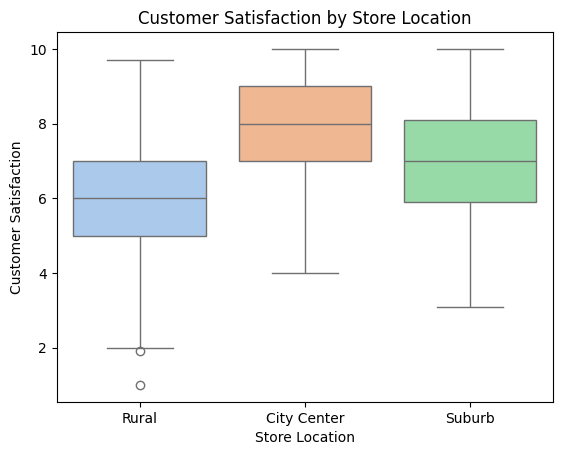

In [8]:
sns.boxplot(data=retail_df, x='Store_Location', y='Customer_Satisfaction', palette='pastel')

plt.title('Customer Satisfaction by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Customer Satisfaction')
plt.show()

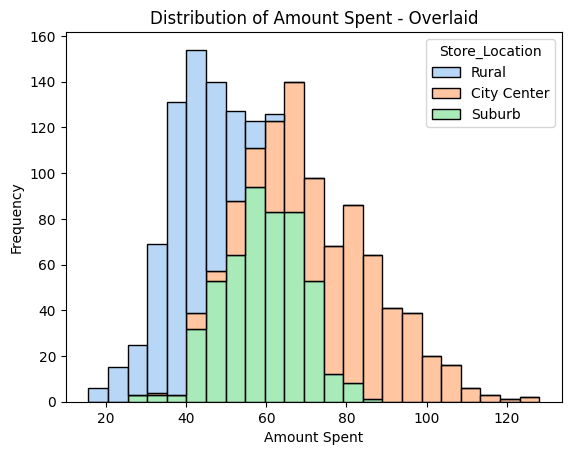

In [9]:
sns.histplot(data=retail_df, x='Amount_Spent', hue='Store_Location', multiple='stack', palette='pastel')
plt.title('Distribution of Amount Spent - Overlaid')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()

#### 2.2 Data Visualization

Create visualizations to understand the distribution of key variables:
- Spending patterns across locations
- Satisfaction ratings distribution
- Product category preferences
- Promotional vs non-promotional spending

<ipython-input-10-ebd0504d48b1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=retail_df, x='Store_Location', y='Amount_Spent', palette='pastel')


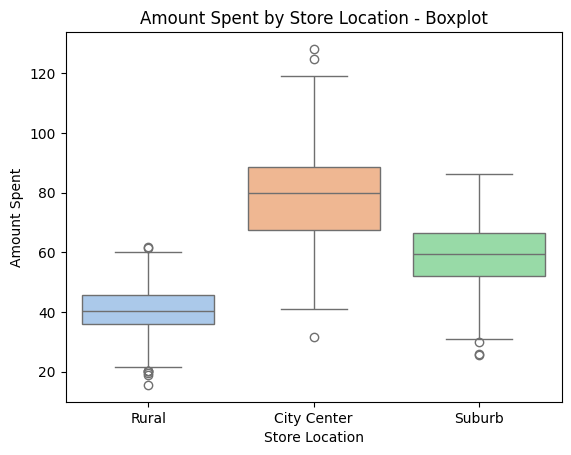

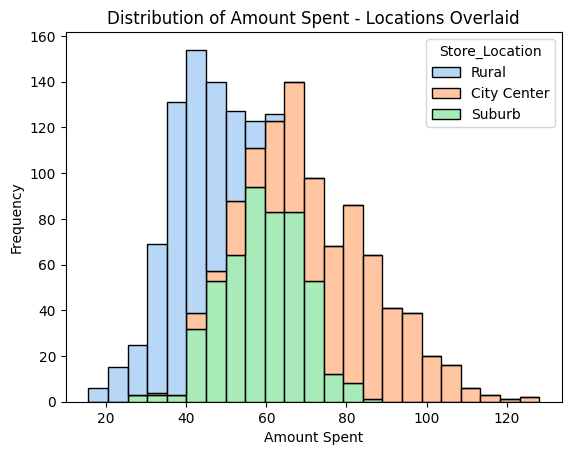

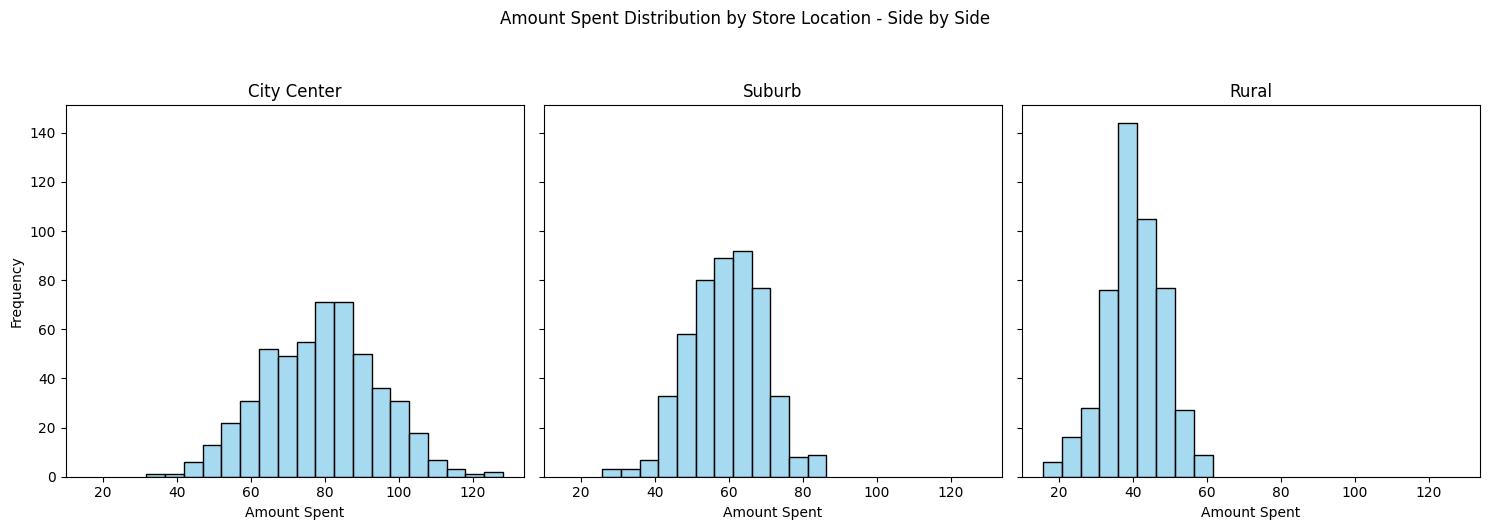

In [10]:
# Visualize data - Create new cells as needed
# spending across locations

# boxplot of all locations
sns.boxplot(data=retail_df, x='Store_Location', y='Amount_Spent', palette='pastel')

plt.title('Amount Spent by Store Location - Boxplot')
plt.xlabel('Store Location')
plt.ylabel('Amount Spent')
plt.show()

# stacked barplot of all three locations
sns.histplot(data=retail_df, x='Amount_Spent', hue='Store_Location', multiple='stack', palette='pastel')
plt.title('Distribution of Amount Spent - Locations Overlaid')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()

# side by side histplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
locations = ['City Center', 'Suburb', 'Rural']
axes = [ax1, ax2, ax3]

for loc, ax in zip(locations, axes):
    subset = retail_df[retail_df['Store_Location'] == loc]
    sns.histplot(data=subset, x='Amount_Spent', binwidth=5, color='skyblue', ax=ax)
    ax.set_title(f'{loc}')
    ax.set_xlabel('Amount Spent')
    ax.set_ylabel('Frequency')

fig.suptitle('Amount Spent Distribution by Store Location - Side by Side', y=1.05)
plt.tight_layout()
plt.show()

<ipython-input-11-5da87175002b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=retail_df, x='Store_Location', y='Customer_Satisfaction', palette='pastel')


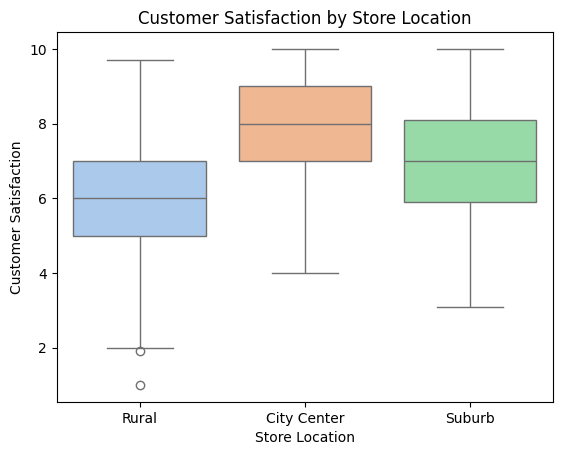

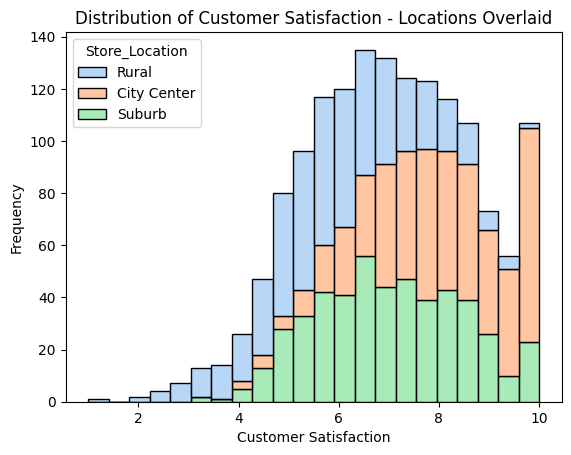

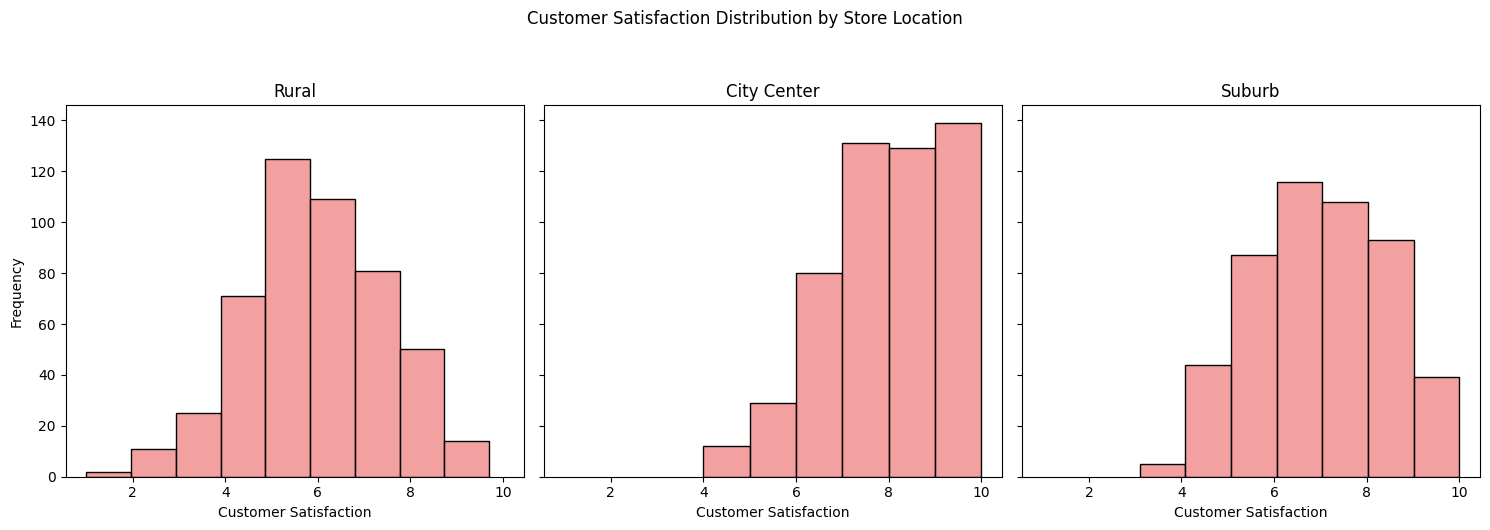

In [11]:
# customer satisfaction across locations

# boxplot across locations
sns.boxplot(data=retail_df, x='Store_Location', y='Customer_Satisfaction', palette='pastel')

plt.title('Customer Satisfaction by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Customer Satisfaction')
plt.show()


sns.histplot(data=retail_df, x='Customer_Satisfaction', hue='Store_Location', multiple='stack', palette='pastel')
plt.title('Distribution of Customer Satisfaction - Locations Overlaid')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Frequency')
plt.show()

# histplot of satisfaction across locations
# Create subplots: 1 row, 3 columns, shared axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# Define store locations and axes
locations = ['Rural', 'City Center', 'Suburb']
axes = [ax1, ax2, ax3]

# Plot for each location
for loc, ax in zip(locations, axes):
    subset = retail_df[retail_df['Store_Location'] == loc]
    sns.histplot(data=subset, x='Customer_Satisfaction', binwidth=1, color='lightcoral', ax=ax)
    ax.set_title(loc)
    ax.set_xlabel('Customer Satisfaction')
    ax.set_ylabel('Frequency')

# Main title and layout adjustments
fig.suptitle('Customer Satisfaction Distribution by Store Location', y=1.05)
plt.tight_layout()
plt.show()

<ipython-input-12-6f5d103a269f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=retail_df, x='Purchase_Type', y='Amount_Spent', palette='pastel')


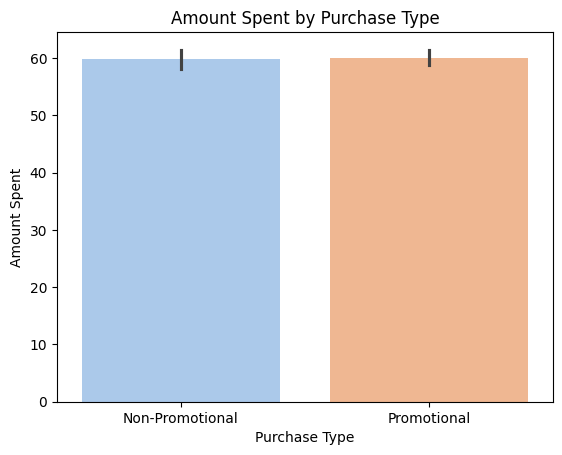

<ipython-input-12-6f5d103a269f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=retail_df, x='Purchase_Type', y='Amount_Spent', palette='pastel')


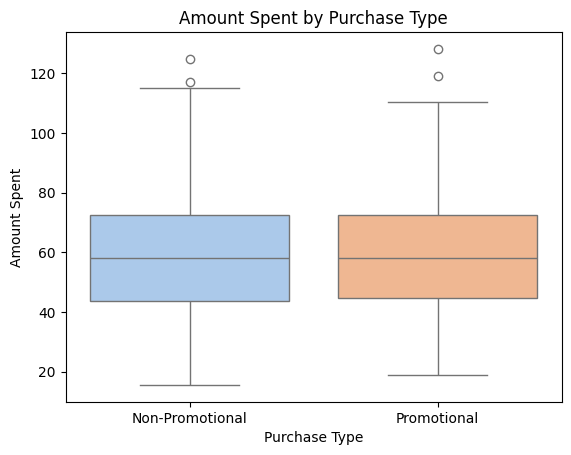

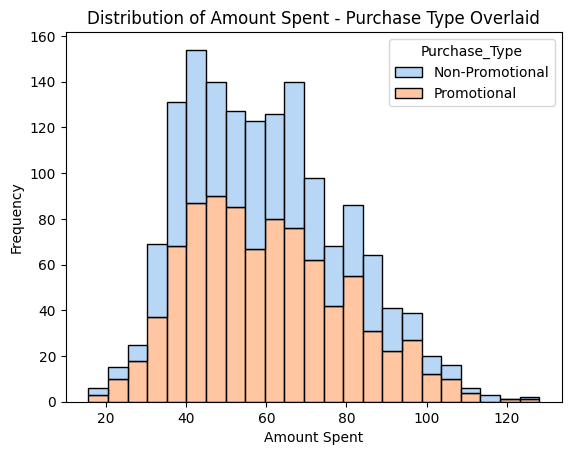

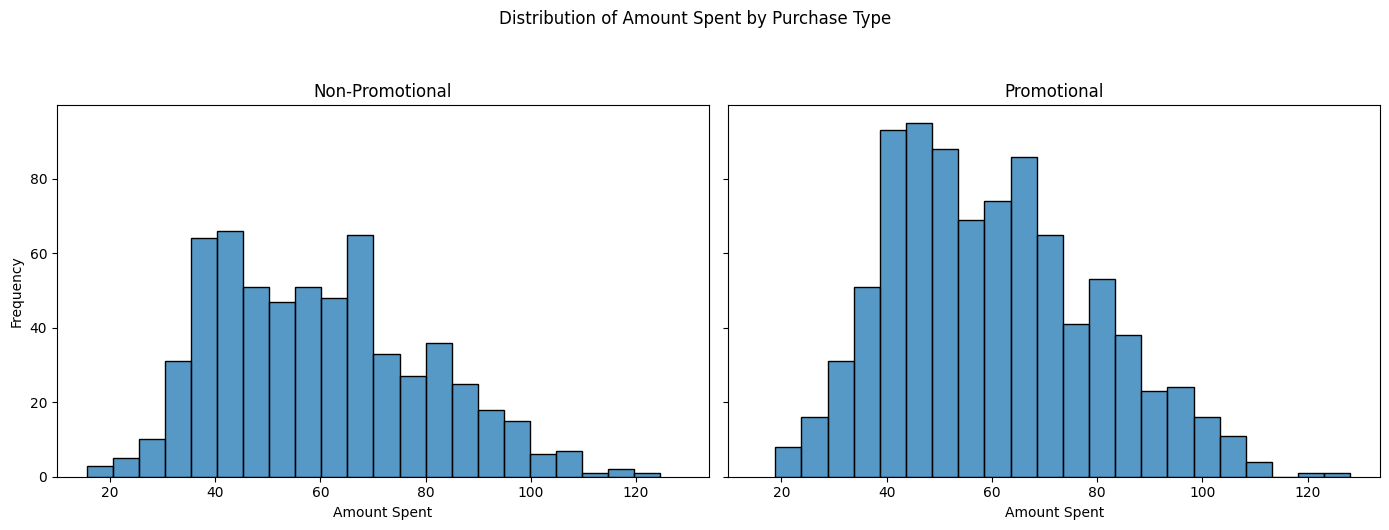

In [12]:
# promotional vs non-promotional spending

# barplot
sns.barplot(data=retail_df, x='Purchase_Type', y='Amount_Spent', palette='pastel')

plt.title('Amount Spent by Purchase Type')
plt.xlabel('Purchase Type')
plt.ylabel('Amount Spent')
plt.show()

# boxplot
sns.boxplot(data=retail_df, x='Purchase_Type', y='Amount_Spent', palette='pastel')

plt.title('Amount Spent by Purchase Type')
plt.xlabel('Purchase Type')
plt.ylabel('Amount Spent')
plt.show()

# histplot
sns.histplot(data=retail_df, x='Amount_Spent', hue='Purchase_Type', multiple='stack', palette='pastel')
plt.title('Distribution of Amount Spent - Purchase Type Overlaid')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')

# histplot separated out
purchase_types = retail_df['Purchase_Type'].unique()

# Create subplots
fig, axes = plt.subplots(1, len(purchase_types), figsize=(14, 5), sharex=True, sharey=True)

# Plot each type
for ax, pt in zip(axes, purchase_types):
    subset = retail_df[retail_df['Purchase_Type'] == pt]
    sns.histplot(data=subset, x='Amount_Spent', binwidth=5, ax=ax)
    ax.set_title(pt)
    ax.set_xlabel('Amount Spent')
    ax.set_ylabel('Frequency')

# Add main title
fig.suptitle('Distribution of Amount Spent by Purchase Type', y=1.05)
plt.tight_layout()
plt.show()

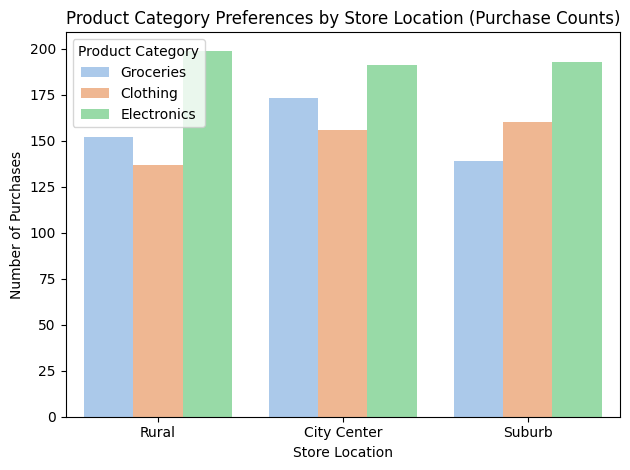

In [13]:
# Product category preferences

sns.countplot(data=retail_df, x='Store_Location', hue='Product_Category', palette='pastel')
plt.title('Product Category Preferences by Store Location (Purchase Counts)')
plt.xlabel('Store Location')
plt.ylabel('Number of Purchases')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

#### 2.3 Test Assumptions

Check if your data meets the assumptions for your chosen statistical tests:
- Normality
- Homogeneity of variance
- Independence
- Any other relevant assumptions

In [14]:
# Assumption tests and checks - Create new cells as needed

# Amount spent based on store location

# check normality

for location in retail_df['Store_Location'].unique():
  spend_data = retail_df[retail_df['Store_Location'] == location]['Amount_Spent']
  shapiro_stat, shapiro_p = stats.shapiro(spend_data)
  print(f"Location: {location}")
  print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
  print(f"p-value: {shapiro_p}\n")

  if shapiro_p < 0.05:
      print(f"Reject the null hypothesis that the amount spent based on store location data is normally distributed.\n")
      print("The data is not normally distributed.\n")
  else:
      print(f"Fail to reject the null hypothesis that the amount spent based on store location data is normally distributed.\n")
      print("The data is normally distributed.\n")

# check homogeneity of variance

city_spend = retail_df[retail_df['Store_Location'] == 'City Center']['Amount_Spent']
suburb_spend = retail_df[retail_df['Store_Location'] == 'Suburb']['Amount_Spent']
rural_spend = retail_df[retail_df['Store_Location'] == 'Rural']['Amount_Spent']

levene_stat, levene_p = stats.levene(city_spend, suburb_spend, rural_spend)
print(f"Levene's Test Statistic: {levene_stat}")
print(f"p-value: {levene_p}\n")

if levene_p < 0.05:
    print("Reject the null hypothesis that the variances of the amount spent based on store location data are equal.\n")
    print("The variances are not equal.\n")
else:
    print("Fail to reject the null hypothesis that the variances of the amount spent based on store location data are equal.\n")
    print("The variances are equal.\n")

# independence of the data is assumed, as we do not expect customers spending
# to depend on each others' spending.

# The variable amount spent is measured at the ratio level

# The normal distribution, independence and level of measurement assumptions
# have been met, but the homoscedasticity or equal variance assumption has not
# been met. Therefore Kruskall-Wallis will need to be used here.

Location: Rural
Shapiro-Wilk Test Statistic: 0.9960247747581376
p-value: 0.2593778777267991

Fail to reject the null hypothesis that the amount spent based on store location data is normally distributed.

The data is normally distributed.

Location: City Center
Shapiro-Wilk Test Statistic: 0.9978416867653055
p-value: 0.7535874078926482

Fail to reject the null hypothesis that the amount spent based on store location data is normally distributed.

The data is normally distributed.

Location: Suburb
Shapiro-Wilk Test Statistic: 0.9940253724796856
p-value: 0.05030848495334306

Fail to reject the null hypothesis that the amount spent based on store location data is normally distributed.

The data is normally distributed.

Levene's Test Statistic: 106.40980858330315
p-value: 6.16909341992288e-44

Reject the null hypothesis that the variances of the amount spent based on store location data are equal.

The variances are not equal.



In [15]:
# customer satisfaction ratings by location

# check normality

for location in retail_df['Store_Location'].unique():
    data = retail_df[retail_df['Store_Location'] == location]['Customer_Satisfaction']
    stat, p = stats.shapiro(data)
    print(f"Location: {location}")
    print(f"Shapiro-Wilk Test Statistic: {stat}")
    print(f"p-value: {p}\n")

    if p < 0.0500:
        print(f"Reject the null hypothesis that the customer satisfaction by store location data is normally distributed.\n")
        print("The data is not normally distributed.\n")
    else:
        print(f"Fail to reject the null hypothesis that the customer satisfaction by store location data is normally distributed.\n")
        print("The data is normally distributed.\n")

# check homogeneity of variance

city_satisfaction = retail_df[retail_df['Store_Location'] == 'City Center']['Customer_Satisfaction']
suburb_satisfaction = retail_df[retail_df['Store_Location'] == 'Suburb']['Customer_Satisfaction']
rural_satisfaction = retail_df[retail_df['Store_Location'] == 'Rural']['Customer_Satisfaction']

levene_stat, levene_p = stats.levene(city_satisfaction, suburb_satisfaction, rural_satisfaction)
print(f"Levene's Test Statistic: {levene_stat}")
print(f"p-value: {levene_p}\n")

if levene_p < 0.05:
    print("Reject the null hypothesis that the variances of the customer satisfaction based on store location data are equal.\n")
    print("The variances are not equal.\n")
else:
    print("Fail to reject the null hypothesis that the variances of the customer satisfaction based on store location data are equal.\n")
    print("The variances are equal.\n")

# We assume the customer satisfaction data is independent. We do not expect
# customers to confer amongst each other regarding their satisfaction scores

# consider customer satisfaction data to be interval level variable since it is
# ordered values and has equal spacing between values

# The variance is equal across store locations for customer satisfaction.
# However, the data for rural and city center is not normally distributed.
# we will need to use Kruskal-Wallis

Location: Rural
Shapiro-Wilk Test Statistic: 0.9965226535757012
p-value: 0.3729864805768711

Fail to reject the null hypothesis that the customer satisfaction by store location data is normally distributed.

The data is normally distributed.

Location: City Center
Shapiro-Wilk Test Statistic: 0.9698547229725109
p-value: 7.413111876725657e-09

Reject the null hypothesis that the customer satisfaction by store location data is normally distributed.

The data is not normally distributed.

Location: Suburb
Shapiro-Wilk Test Statistic: 0.9889755567238768
p-value: 0.0009247963793123043

Reject the null hypothesis that the customer satisfaction by store location data is normally distributed.

The data is not normally distributed.

Levene's Test Statistic: 1.6154302575557304
p-value: 0.19915148116426468

Fail to reject the null hypothesis that the variances of the customer satisfaction based on store location data are equal.

The variances are equal.



In [16]:
# amount spent based on purchase type (promotional vs non-promotional)

# check normality

for purchase_type in retail_df['Purchase_Type'].unique():
  spend_data = retail_df[retail_df['Purchase_Type'] == purchase_type]['Amount_Spent']
  shapiro_stat, shapiro_p = stats.shapiro(spend_data)
  print(f"Purchase Type: {purchase_type}")
  print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
  print(f"p-value: {shapiro_p}\n")

  if shapiro_p < 0.05:
      print(f"Reject the null hypothesis that the amount spent based on purchase type data is normally distributed.\n")
      print("The data is not normally distributed.\n")
  else:
      print(f"Fail to reject the null hypothesis that the amount spent based on purchase type data is normally distributed.\n")
      print("The data is normally distributed.\n")

# check homogeneity of variance

promo = retail_df[retail_df['Purchase_Type'] == 'Promotional']['Amount_Spent']
non_promo = retail_df[retail_df['Purchase_Type'] == 'Non-Promotional']['Amount_Spent']

levene_stat, levene_p = stats.levene(promo, non_promo)
print(f"Levene's Test Statistic: {levene_stat}")
print(f"p-value: {levene_p}\n")

if levene_p < 0.05:
    print("Reject the null hypothesis that the variances of the amount spent based on purchase type data are equal.\n")
    print("The variances are not equal.\n")
else:
    print("Fail to reject the null hypothesis that the variances of the amount spent based on purchase type data are equal.\n")
    print("The variances are equal.\n")

# independence of the data is assumed, as we do not expect customers spending
# to depend on each others' spending.

# The variable amount spent is measured at the ratio level

# The homoscedasticity, independence and level of measurement assumptions
# have been met, but the normal distribution assumption has not
# been met. Therefore Mann Whitney will be used since there are 2 groups

Purchase Type: Non-Promotional
Shapiro-Wilk Test Statistic: 0.9753559763716076
p-value: 1.2534225431053937e-08

Reject the null hypothesis that the amount spent based on purchase type data is normally distributed.

The data is not normally distributed.

Purchase Type: Promotional
Shapiro-Wilk Test Statistic: 0.9791409255490197
p-value: 5.87093332606258e-10

Reject the null hypothesis that the amount spent based on purchase type data is normally distributed.

The data is not normally distributed.

Levene's Test Statistic: 0.38605478155178413
p-value: 0.5344750353145763

Fail to reject the null hypothesis that the variances of the amount spent based on purchase type data are equal.

The variances are equal.



In [17]:
# Product category preferences by location

# to perform a chi squared test of independence. The 2 categorical variables are
# product category and store location. observations are assumed independent, each
# purchase of a product category at a store location is independent of each other

# Create contingency table
contingency = pd.crosstab(retail_df['Store_Location'], retail_df['Product_Category'])

# Chi-square test
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency)

# Display results
print("Chi-Square Test Statistic:", chi2_stat)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

Chi-Square Test Statistic: 4.7683585905269394
p-value: 0.3119014920331143
Degrees of Freedom: 4

Expected Frequencies Table:
Product_Category  Clothing  Electronics   Groceries
Store_Location                                     
City Center        157.040   202.106667  160.853333
Rural              147.376   189.669333  150.954667
Suburb             148.584   191.224000  152.192000


#### 2.4 Choose Appropriate Statistical Tests

Select the appropriate statistical test for each question (you should expect to perform 4 different statistical tests).

1. Spending across store locations
2. Customer satisfaction across locations
3. Promotional vs non-promotional spending
4. Product category preferences across locations

NOTE: Use [Dunn's Test](https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn.html) for Non-Parametric Post-hoc if needed. You might need to pip install scikit-postdoc package. You want to set p_adjust='bonferroni' for Dunn's Test.



**Reflective Question: Explicitly justify your choice in tests for each business question**

**For amount spent across store locations:** independence of the data is assumed, as we do not expect customers spending to depend on each others' spending.

The variable amount spent is measured at the ratio level

The normal distribution, independence and level of measurement assumptions
have been met, but the homoscedasticity or equal variance assumption has not
been met. Therefore Kruskall-Wallis will need to be used here.

**For customer satisfaction across locations:** We assume the customer satisfaction data is independent. We do not expect customers to confer amongst each other regarding their satisfaction scores

consider customer satisfaction data to be interval level variable since it is
ordered values and has equal spacing between values

The variance is equal across store locations for customer satisfaction.
However, the data for rural and city center is not normally distributed.
we will need to use Kruskal-Wallis

**For promotional vs non-promotional spending: ** independence of the data is assumed, as we do not expect customers spending to depend on each others' spending.

The variable amount spent is measured at the ratio level

The homoscedasticity, independence and level of measurement assumptions
have been met, but the normal distribution assumption has not
been met. Therefore Mann-Whitney will need to be used here.

**Product category preferences across locations:** to perform a chi squared test of independence. The 2 categorical variables are
product category and store location. observations are assumed independent, each
purchase of a product category at a store location is independent of each other

### Part 3: Statistical Analysis

Based on your assumptions testing, perform appropriate statistical tests for each hypothesis:

#### 3.1 Spending Across Locations

In [18]:
!pip install scikit-posthocs
import scikit_posthocs as sp

In [19]:
# Conduct your analysis of spending patterns here
spend_stat, spend_p = stats.kruskal(city_spend, suburb_spend, rural_spend)

print(f"Kruskal-Wallis Test Statistic: {spend_stat}")
print(f"p-value: {spend_p}\n")

if spend_p < 0.05:
    print("Reject the null hypothesis that there is no statistically significant difference in average spending across store locations.\n")
    print("At least one store's average spending differs from the others.\n")
else:
    print("Fail to reject the null hypothesis that there is no statistically significant difference in average spending across store locations.\n")
    print("There is no statistically significant difference in average spending across store locations.\n")

dunn_spending = sp.posthoc_dunn(
    retail_df,
    val_col='Amount_Spent',
    group_col='Store_Location',
    p_adjust='bonferroni'
)

print(dunn_spending)

# Post-hoc Dunn’s tests (with Bonferroni correction) revealed statistically
# significant differences in spending between all pairs of store locations:

# City Center vs Rural (p < 0.001)

# City Center vs Suburb (p < 0.001)

# Suburb vs Rural (p < 0.001)

Kruskal-Wallis Test Statistic: 1040.8535534527603
p-value: 9.583466587567362e-227

Reject the null hypothesis that there is no statistically significant difference in average spending across store locations.

At least one store's average spending differs from the others.

               City Center          Rural        Suburb
City Center   1.000000e+00  2.502288e-227  1.425221e-45
Rural        2.502288e-227   1.000000e+00  4.018599e-70
Suburb        1.425221e-45   4.018599e-70  1.000000e+00


#### 3.2 Customer Satisfaction Analysis

In [20]:
# Analyze customer satisfaction here
cust_stat, cust_p = stats.kruskal(city_satisfaction, suburb_satisfaction, rural_satisfaction)

print(f"Kruskal-Wallis Test Statistic: {cust_stat}")
print(f"p-value: {cust_p}\n")

if cust_p < 0.05:
    print("Reject the null hypothesis that there is no statistically significant difference in average customer satisfaction across store locations.\n")
    print("At least one store's average customer satisfaction differs from the others.\n")
else:
    print("Fail to reject the null hypothesis that there is no statistically significant difference in average customer satisfaction across store locations.\n")
    print("There is no statistically significant difference in average customer satisfaction across store locations.\n")

# Run Dunn's test for customer satisfaction
dunn_satisfaction = sp.posthoc_dunn(
    retail_df,
    val_col='Customer_Satisfaction',
    group_col='Store_Location',
    p_adjust='bonferroni'  # corrects for multiple comparisons
)

print(dunn_satisfaction)

# All three store locations show statistically significant differences in customer
#  satisfaction, just like they did for spending.

# City Center vs Rural (p < 0.001)

# City Center vs Suburb (p < 0.001)

# Suburb vs Rural (p < 0.001)

Kruskal-Wallis Test Statistic: 359.54743316479437
p-value: 8.419123825684336e-79

Reject the null hypothesis that there is no statistically significant difference in average customer satisfaction across store locations.

At least one store's average customer satisfaction differs from the others.

              City Center         Rural        Suburb
City Center  1.000000e+00  1.076942e-79  2.509905e-20
Rural        1.076942e-79  1.000000e+00  6.562684e-21
Suburb       2.509905e-20  6.562684e-21  1.000000e+00


#### 3.3 Promotional Impact Analysis

In [21]:
from scipy.stats import mannwhitneyu

In [22]:
# Analyze the impact of promotions here
mw_stat, mw_p = mannwhitneyu(promo, non_promo, alternative='two-sided')

print(f"Mann-Whitney U Test Statistic: {mw_stat}")
print(f"p-value: {mw_p}\n")

if mw_p < 0.05:
    print("Reject the null hypothesis: Spending differs significantly between promotional and non-promotional purchases.")
else:
    print("Fail to reject the null hypothesis: No significant difference in spending between promotional and non-promotional purchases.")

Mann-Whitney U Test Statistic: 275125.0
p-value: 0.6803724143208659

Fail to reject the null hypothesis: No significant difference in spending between promotional and non-promotional purchases.


#### 3.4 Product Category Analysis

In [23]:
# Analyze product category preferences here
# To determine whether product category preferences differ across store locations,
# a Chi-Square Test of Independence was performed using a contingency table of purchase counts.

# - Test statistic: 4.77
# - Degrees of freedom: 4
# - p-value: 0.3119

# Since p > 0.05, we **fail to reject the null hypothesis**. This indicates that
# product category preference is **not significantly associated** with store location.

### Part 4: Results Interpretation

For each analysis, provide:
1. A clear statement of the statistical results
2. The practical significance of these findings
3. Visualizations that support your conclusions
4. Specific business recommendations

In [24]:
# Calculate effect sizes - contrast with MDE

# for amount spent by location:
# Means

mean_city_spend = city_spend.mean()
mean_suburb_spend = suburb_spend.mean()
mean_rural_spend = rural_spend.mean()

print(f"Mean city spend: ${mean_city_spend:.2f}")
print(f"Mean suburb spend: ${mean_suburb_spend:.2f}")
print(f"Mean rural spend: ${mean_rural_spend:.2f}")

# chose mean_rural_spend as the baseline because it is the lowest of the 3 mean
# spends across locations
mde_spending = mean_rural_spend * 0.15  # 15%

print(f"\nThe business-relevant MDE that we want to meet or exceed is a\
difference of 15% or more. We apply that 15% to the lowest mean spend which is \
from the mean rural spend and the difference is ${mde_spending}")

# Differences
diff_city_rural = mean_city_spend - mean_rural_spend
diff_suburb_rural = mean_suburb_spend - mean_rural_spend
diff_city_suburb = mean_city_spend - mean_suburb_spend

print(f"\nDifference between mean city spend and mean rural spend: ${diff_city_rural:.2f}")
print(f"Difference between mean suburb spend and mean rural spend: ${diff_suburb_rural:.2f}")
print(f"Difference between mean city spend and mean suburb spend: ${diff_city_suburb:.2f}")

# all 3 differences exceed the MDE of 15% aka $6.07

# eta squared

n_total = len(city_spend) + len(suburb_spend) + len(rural_spend)
eta_squared_kw = spend_stat / (n_total - 1)

print(f"\nEta squared (spending): {eta_squared_kw:.4f}")

# ~69% of variance is explained by store location

Mean city spend: $78.89
Mean suburb spend: $59.16
Mean rural spend: $40.46

The business-relevant MDE that we want to meet or exceed is adifference of 15% or more. We apply that 15% to the lowest mean spend which is from the mean rural spend and the difference is $6.069464139344261

Difference between mean city spend and mean rural spend: $38.43
Difference between mean suburb spend and mean rural spend: $18.69
Difference between mean city spend and mean suburb spend: $19.74

Eta squared (spending): 0.6944


In [25]:
# calculate effect sizes for customer satisfaction by location

# means
mean_city_satisfaction = city_satisfaction.mean()
mean_suburb_satisfaction = suburb_satisfaction.mean()
mean_rural_satisfaction = rural_satisfaction.mean()

print(f"Mean city satisfaction: {mean_city_satisfaction:.2f}")
print(f"Mean suburb satisfaction: {mean_suburb_satisfaction:.2f}")
print(f"Mean rural satisfaction: {mean_rural_satisfaction:.2f}")

# the differences are made in comparison to rural satisfaction since it has the
# lowest mean

# differences
diff_city_rural = mean_city_satisfaction - mean_rural_satisfaction
diff_suburb_rural = mean_suburb_satisfaction - mean_rural_satisfaction
diff_city_suburb = mean_city_satisfaction - mean_suburb_satisfaction

print(f"\nDifference between mean city satisfaction and mean rural satisfaction: {diff_city_rural:.2f}")
print(f"Difference between mean suburb satisfaction and mean rural satisfaction: {diff_suburb_rural:.2f}")
print(f"Difference between mean city satisfaction and mean suburb satisfaction: {diff_city_suburb:.2f}")

# The MDE of a 1.0 point difference is met for the differences in mean customer satisfaction between city
# and rural, and suburb and rural. MDE is not met in one case because the difference between
# city and suburb means is 0.95.

n_total = len(city_satisfaction) + len(suburb_satisfaction) + len(rural_satisfaction)
eta_squared_kw = cust_stat / (n_total - 1)

print(f"\nEta squared (satisfaction): {eta_squared_kw:.4f}")

# 24% of variance in satisfaction is explained by store location

Mean city satisfaction: 7.95
Mean suburb satisfaction: 7.01
Mean rural satisfaction: 5.96

Difference between mean city satisfaction and mean rural satisfaction: 1.99
Difference between mean suburb satisfaction and mean rural satisfaction: 1.05
Difference between mean city satisfaction and mean suburb satisfaction: 0.95

Eta squared (satisfaction): 0.2399


In [26]:
# calculate effect sizes for impact of promotions

mean_diff_promo = promo.mean() - non_promo.mean()
median_diff_promo = promo.median() - non_promo.median()

print(f"Mean difference between promotional and non-promotional spending: ${mean_diff_promo:.2f}")
print(f"Median difference between promotional and non-promotional spending: ${median_diff_promo:.2f}")

# The MDE of a $15 increase is not met for promotional spending. Neither the mean difference or
# median difference in promotional vs non-promotional spending has been met

# for 2 independent groups, use Cohen's d instead of eta squared

mean_diff = promo.mean() - non_promo.mean()
pooled_sd = np.sqrt((promo.std()**2 + non_promo.std()**2) / 2)
cohens_d = mean_diff / pooled_sd

print(f"Cohen's d: {cohens_d:.4f}")

# cohen's d of 0.0128 indicates a negligible effect

Mean difference between promotional and non-promotional spending: $0.25
Median difference between promotional and non-promotional spending: $0.11
Cohen's d: 0.0128


In [27]:
# calculate effect sizes for product categories vs location

chi2_stat, p, dof, expected = stats.chi2_contingency(contingency)

# Calculate Cramér’s V
n = contingency.sum().sum()
k = min(contingency.shape)  # Smaller of rows or columns
cramers_v = np.sqrt(chi2_stat / (n * (k - 1)))

print(f"Cramér's V: {cramers_v:.4f}")

# cramer's V gives a 0.0399 value which is neglgible, meaning there is no
# statistically siciific difference between product categories and store location

Cramér's V: 0.0399


**Reflective Question: Results - Clearly state whether the null hypotheses were rejected or not. Frame this in the business question context. Use effect sizes (e.g., Cohen’s d, eta squared) to contextualize the significance of your results.**

**For Q1,** based on the Kruskal-Wallis Test Statistic: 1040.8535534527603 and
p-value: 9.583466587567362e-227 < alpha=0.05, we reject the null hypothesis that there is no statistically significant difference in average spending across store locations.
We conclude that at least one store's average spending (u) differs by 15% or more from the others.

Examing mean spend by location we find:
Mean city spend: $78.89
Mean suburb spend: $59.16
Mean rural spend: $40.46

The business-relevant Minimum Detectable Effect (MDE) is a 15% difference relative to the lowest group (Rural), which equals $6.06.

Based on these differences:
Difference between mean city spend and mean rural spend: $38.43
Difference between mean suburb spend and mean rural spend: $18.69
Difference between mean city spend and mean suburb spend: $19.74

All pairwise differences exceed the MDE, indicating the differences are not only statistically significant but also practically meaningful.

Effect size:
Eta squared (spending): 0.6944

This means that ~69% of variance is explained by store location, a very large effect. This represents enough of a difference to warrant location-specific strategies.

**For Q2**, based on the Kruskal-Wallis Test Statistic: 359.54743316479437 and
p-value: 8.419123825684336e-79 < alpha=0.05, we reject the null hypothesis that there is no statistically significant difference in average customer satisfaction across store locations.
We conclude that at least one store's average customer satisfaction score differs from the others by at least 1.0 point

Examining mean satisfaction by location we find:
Mean city satisfaction: 7.95
Mean suburb satisfaction: 7.01
Mean rural satisfaction: 5.96

The business-relevant MDE is a 1.0 point difference relative to the lowest group (Rural).

Based on these differences:
Difference between mean city satisfaction and mean rural satisfaction: 1.99
Difference between mean suburb satisfaction and mean rural satisfaction: 1.05
Difference between mean city satisfaction and mean suburb satisfaction: 0.95

Two out of three pairwise differences exceed the MDE (city vs rural, suburb vs rural). Although city vs suburb at 0.95 is just under the MDE, it is close enough where we could consider it practically relevant, especially given the strong statistical significance (Dunn's p-value = 2.509905e-20).

Effect size:
Eta squared (satisfaction): 0.2399

This means that 24% of variance in satisfaction is explained by store location, a large effect. This represents enough of a difference to execute customer service improvements.

**For Q3,** based on the Mann-Whitney U Test Statistic: 275125.0 and p-value: 0.6803724143208659 > alpha=0.05, we fail to reject the null hypothesis that there is no statistically significant difference in promotional vs non-promotional spending. This means promotions did not lead to a statistically significant increase in customer spending.

The business-relevant MDE is a $15 increase from non-promotional periods.

Based on mean and median differences:
Mean difference between promotional and non-promotional spending: $0.25
Median difference between promotional and non-promotional spending: $0.11

Effect size:
Cohen's d: 0.0128

Both observed differences fall way below the defined threshold of $15 increase. The Cohen's d test confirms that the impact is negligible.

**For Q4,** we conducted a chi squared test of independence to determine whether product category preferences differ across store locations.

Test statistic: 4.77
Degrees of freedom: 4
p-value: 0.3119

Since p > 0.05, we fail to reject the null hypothesis. This indicates that
product category preference is not significantly associated with store location.

Effect size:
Cramér's V: 0.0399

This indicates a very weak association between store location and product category preference.

**Reflective Question: Recommendations - Explain the practical implications of the results. What should the company do based on your findings about spending, satisfaction, or product preferences?**


Based on my findings about spending by location, the firm should invest in location specific strategies. For the city center and suburb locations, since their average spend is higher, the firm should investigate further why the average spend is higher. Are customers purchasing items that are on average more expensive, such as organic product and meats, or brand name/luxury clothes, and/or the hottest tech. Based on the results, the firm should market those kind of products more.

On the other hand, for the rural locations, the firm should investigate why customers aren't spending as much as those at the city and suburb locations. Are the rural locations not stocking what the customers are looking for, is the experience lacking in some way compared to the other locations? Once root cause is found, the firm should implement appropriate strategies to bring up the average spend at rural locations.

Based on customer satisfaction scores, the firm should heavily investigate and invest in the customer experience at the rural locations. The rural locations have >1.0 point difference in customer satisfaction compared to both city and suburb. The firm should see if the marketing or messaging is not aligned with what rural customers are looking for. Perhaps retraining of associates to the cultural aspects of the rural locations is needed. Additionally, when looking at city vs suburb locations, the mean difference came back as 0.95 which is below the defined MDE, but practically close enough to 1.0. It is advisable to also look at why the suburb locations aren't doing as well as the city locations.

Based on promotional vs non-promotional spend, there was no difference in spending. The difference was nowhere close to the MDE of $15, so it is inadviable to further invest in any promotional costs at this time. The reduction in margins is not offset by any increased promotional spend. In the meantime, the firm should investigate as to why promotions are ineffective at this time. When they have been revamped the firm can consider executing promotions then.

Based on product category preferences vs location, there is no difference in product preferences based on location. No location prefers groceries, electronics, or clothing over another location. No action should be taken in this regard at this time.

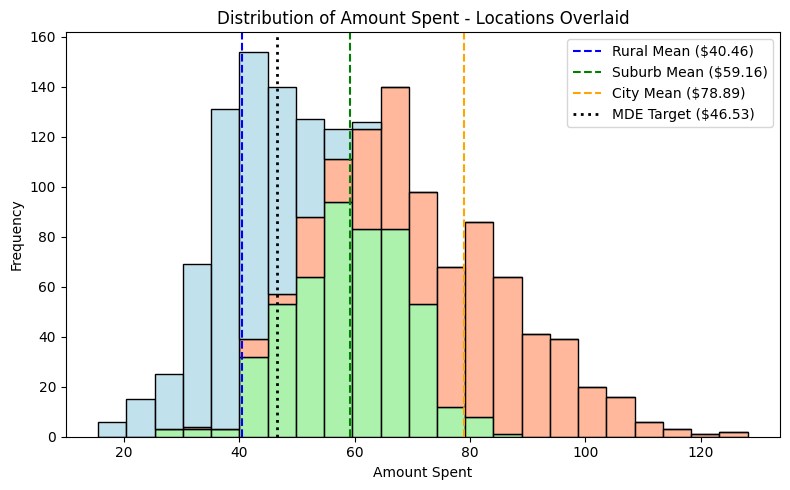

In [31]:
# Create visualizations to support results - Create new cells as needed

# Set colors to match your histogram hues
colors = {'City Center': 'lightsalmon', 'Suburb': 'lightgreen', 'Rural': 'lightblue'}

# Compute means
# mean_rural = df[df['Store_Location'] == 'Rural']['Amount_Spent'].mean()
# mean_city = df[df['Store_Location'] == 'City Center']['Amount_Spent'].mean()
# mean_suburb = df[df['Store_Location'] == 'Suburb']['Amount_Spent'].mean()

# MDE threshold
mde_target = mean_rural_spend * 1.15  # 15% above rural

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(data=retail_df, x='Amount_Spent', hue='Store_Location', multiple='stack', palette=colors)

# Add vertical lines for means
plt.axvline(mean_rural_spend, color='blue', linestyle='--', label=f'Rural Mean (${mean_rural_spend:.2f})')
plt.axvline(mean_suburb_spend, color='green', linestyle='--', label=f'Suburb Mean (${mean_suburb_spend:.2f})')
plt.axvline(mean_city_spend, color='orange', linestyle='--', label=f'City Mean (${mean_city_spend:.2f})')

# Add MDE line
plt.axvline(mde_target, color='black', linestyle=':', linewidth=2, label=f'MDE Target (${mde_target:.2f})')

plt.title('Distribution of Amount Spent - Locations Overlaid')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

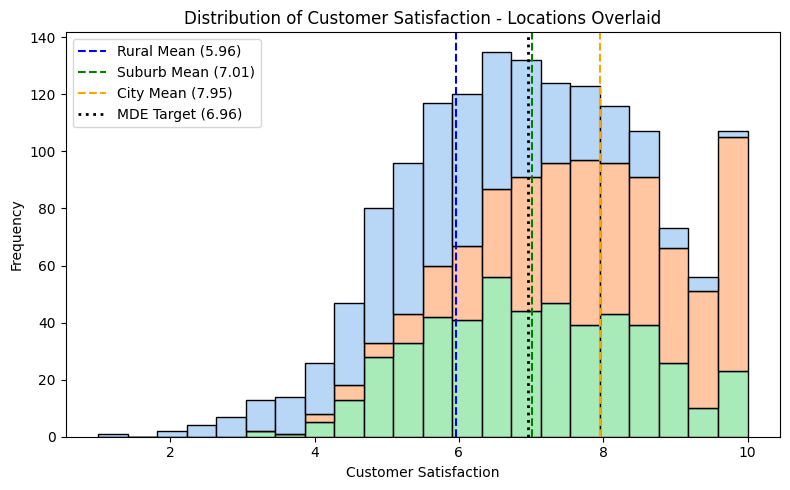

In [32]:
# customer satisfaction by location
# MDE = 1.0 point above rural mean
mde_satisfaction = mean_rural_satisfaction + 1.0

# Create histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=retail_df, x='Customer_Satisfaction', hue='Store_Location', multiple='stack', palette='pastel')

# Add vertical lines for group means
plt.axvline(mean_rural_satisfaction, color='blue', linestyle='--', label=f'Rural Mean ({mean_rural_satisfaction:.2f})')
plt.axvline(mean_suburb_satisfaction, color='green', linestyle='--', label=f'Suburb Mean ({mean_suburb_satisfaction:.2f})')
plt.axvline(mean_city_satisfaction, color='orange', linestyle='--', label=f'City Mean ({mean_city_satisfaction:.2f})')

# Add vertical line for MDE threshold
plt.axvline(mde_satisfaction, color='black', linestyle=':', linewidth=2, label=f'MDE Target ({mde_satisfaction:.2f})')

# Final plot touches
plt.title('Distribution of Customer Satisfaction - Locations Overlaid')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-36-eb84eaa3c201>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=retail_df, x='Purchase_Type', y='Amount_Spent', palette='pastel')
<ipython-input-36-eb84eaa3c201>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=retail_df, x='Purchase_Type', y='Amount_Spent', estimator=np.mean, ci=None, palette='pastel')
<ipython-input-36-eb84eaa3c201>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=retail_df, x='Purchase_Type', y='Amount_Spent', estimator=np.mean, ci=None, palette='pastel')


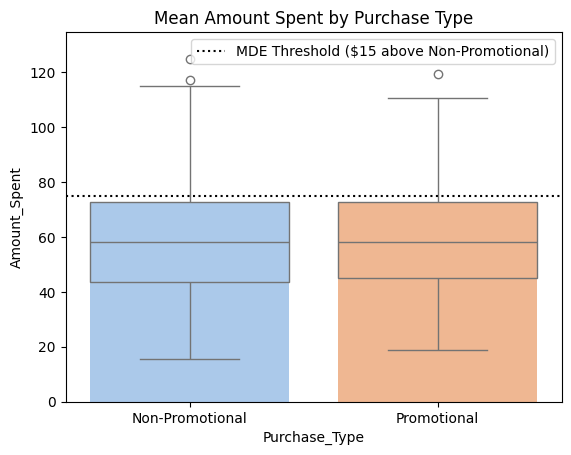

In [36]:
# promotional impact

sns.boxplot(data=retail_df, x='Purchase_Type', y='Amount_Spent', palette='pastel')
plt.title('Amount Spent: Promotional vs Non-Promotional')

sns.barplot(data=retail_df, x='Purchase_Type', y='Amount_Spent', estimator=np.mean, ci=None, palette='pastel')
plt.axhline(retail_df[retail_df['Purchase_Type'] == 'Non-Promotional']['Amount_Spent'].mean() + 15,
            color='black', linestyle=':', label='MDE Threshold ($15 above Non-Promotional)')
plt.title('Mean Amount Spent by Purchase Type')
plt.legend()




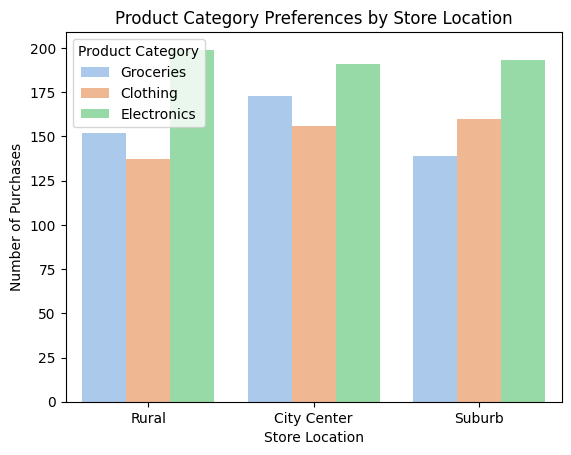

In [39]:
sns.countplot(data=retail_df, x='Store_Location', hue='Product_Category', palette='pastel')
plt.title('Product Category Preferences by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Number of Purchases')
plt.legend(title='Product Category')

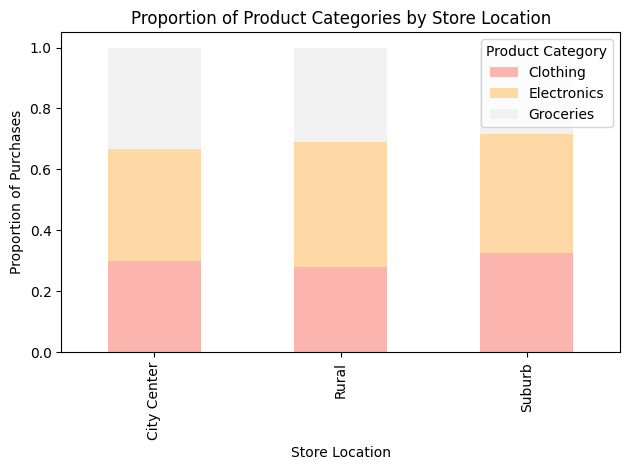

In [43]:
# Create a crosstab and normalize by row (location)
crosstab = pd.crosstab(retail_df['Store_Location'], retail_df['Product_Category'], normalize='index')

# Plot as stacked bar chart
crosstab.plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Proportion of Product Categories by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Proportion of Purchases')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

### Part 5: Reflection

Discuss:
1. The strengths and limitations of your analysis
2. Any assumptions or potential biases in the data
3. Suggestions for additional data collection
4. How this analysis could be improved

**Reflective Question: Explain the importance of experimental design and sufficient sample size in conducting a robust analysis. Identify any limitations in the dataset or analysis (e.g., potential biases, unmeasured variables) and suggest additional data the company could collect to improve future analyses.**

The analysis used the appropriate statistical tests. Kruskal-Wallis for the amount spent by location and customer satisfaction by location questions, Mann-Whitney for the promotional spending question, and Chi-squared independence for the product category question. The tests were selected based on the type and distribution of data which were thoroughly investigated beforehand. Results were compared against the business defined MDEs, to ensure that the conclusions made were not only statistically sound, but practical on the business front as well. Visualizations were chosen to align with each hypothesis and support conclusions.

The analysis may be limited by the data which should accurately reflect customer behavior, but might not account for any confounding factors outside of what was captured.

We assumed that the data was independent, that customers did not converse amongst each other. But maybe some customers visit multiple location types. There was no indication of the sampling plan. We don't know if it was random sampling or stratified sampling. The data also doesn't distinguish between new customers who may be shocked or fall in love at first sight,  and veterans who maybe have a bias one way or the other.

Additional data to be collected could be customer demographics, eg. age, income, household size. We could track repeat customers, to see if they visit once in a while, or frequently on a weekly basis. We could also sample additional data such as qualitative data regarding what the customers are satisfied or dissatisfied with at the stores.

This analysis could be improved if regression modeling were included to control for multiple variables at once and if there was a power analysis to confirm sample size was sufficient to detect the predefined MDEs.